# Note
1. Melakukan percobaan build_models v4.0
2. Dilakukan pada hari Senin, 29 Juli 2024
3. Tempat di Kost
4. Data menggunakan Dataset yang dari Roboflow 
4. Meliputi Class: 20 Kelas Aksara Jawa:
- Ba, Ca, Da, Dha, Ga, Ha, Ja, Ka, La, Ma, 
- Na, Nga, Nya, Pa, Ra, Sa, Ta, Tha, Wa, Ya

# Setup Environment 

In [ ]:
# pip install tensorflow

In [ ]:
# pip install keras

In [ ]:
# pip install opencv-python

In [ ]:
# pip install imutils

In [ ]:
# pip install matplotlib

In [ ]:
# pip install seaborn

In [ ]:
# pip install scikit-learn

# Import Library

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt  
# import os
# from os.path import join
# import random
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.utils import to_categorical
# from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
# from keras.models import Sequential
# from tensorflow.keras import layers, models
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization , Activation,Conv2D
# from keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
# from sklearn.metrics import roc_curve, auc, roc_auc_score
# from sklearn.metrics import classification_report
# import seaborn as sns
# from sklearn.metrics import classification_report, accuracy_score,roc_curve,confusion_matrix 

# Preprocessing

In [1]:
import os
import pandas as pd
import cv2

def convert_to_png(image_path, output_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    # Create the output directory if it doesn't exist
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    # Save the image as PNG
    cv2.imwrite(output_path, image)

def get_last_n_parts(path, n):
    return os.path.join(*path.split(os.sep)[-n:])

def create_labels_csv(DATASET_PATH, OUTPUT_CSV, OUTPUT_IMAGE_DIR):
    # List to store image file paths and their corresponding labels and dimensions
    data = []

    # Traverse the dataset directory
    for root, dirs, files in os.walk(DATASET_PATH):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                # Get the class label from the subdirectory name
                label = os.path.basename(root)
                # Get the full file path
                file_path = os.path.join(root, file)
                
                # Create a new file path for the PNG image
                relative_path = os.path.relpath(file_path, DATASET_PATH)
                png_file_path = os.path.join(OUTPUT_IMAGE_DIR, os.path.splitext(relative_path)[0] + '.png')
                
                # Convert the image to PNG
                convert_to_png(file_path, png_file_path)
                
                # Get image dimensions
                img = cv2.imread(file_path)
                height, width, _ = img.shape
                
                # Get only the last 3 parts of the path for CSV
                csv_path = get_last_n_parts(png_file_path, 2)
                
                # Append to the data list including dimensions
                data.append([csv_path, width, height, label])
    
    # Create a DataFrame from the data list
    df = pd.DataFrame(data, columns=['file_path', 'width', 'height', 'label'])
    
    # Save the DataFrame to a CSV file
    df.to_csv(OUTPUT_CSV, index=False)
    print(f'Labels CSV file created at: {OUTPUT_CSV}')

# Define the paths for the two datasets and their respective output directories
DATASET_PATH = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_original\\Dataset_Collection_4_Data_Sources\\"
OUTPUT_CSV = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.6_data_collection\\labels.csv"
OUTPUT_IMAGE_DIR = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.6_data_collection\\"

# Process the first dataset
create_labels_csv(DATASET_PATH, OUTPUT_CSV, OUTPUT_IMAGE_DIR)

Labels CSV file created at: C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v3.6_data_collection\labels.csv


In [2]:
import pandas as pd

# Path ke dua file CSV yang berbeda
path_main = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.6_data_collection\\"
file = path_main + "labels.csv"
df = pd.read_csv(file)
df.head()

,file_path,width,height,label
0,ba\002798ad-631c-4f0c-b899-aa66fb5c2ac1.png,239,167,ba
1,ba\040ab1c7-bffa-4a93-8c42-54e5597f2243.png,96,67,ba
2,ba\0789a0d8-e129-48ec-b74e-2e53f4a7ece9.png,235,166,ba
3,ba\11f6c317-635a-4e64-8552-05bf8b7b3a95.png,96,67,ba
4,ba\13469389-6f9b-43dc-be99-8dfbfaae51cb.png,235,165,ba


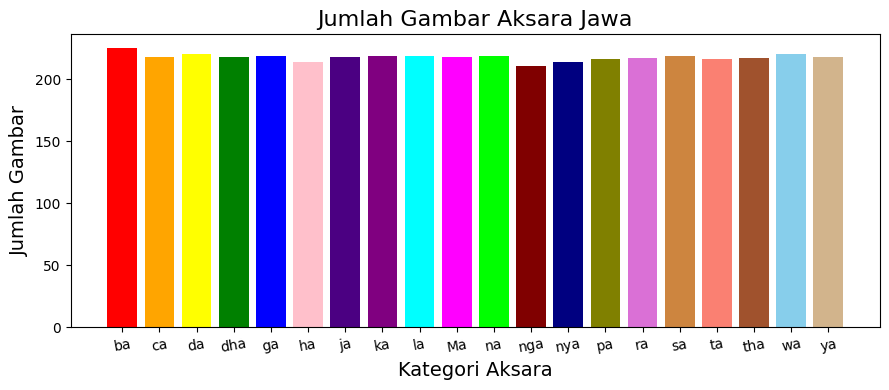

In [3]:
import matplotlib.pyplot as plt
import os

# Define function to count files in each directory
def count_files(link):
    path = link
    num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    return num_files

# Define paths for two sources
source_paths = [
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.6_data_collection\\ba",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.6_data_collection\\ca",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.6_data_collection\\da",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.6_data_collection\\dha",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.6_data_collection\\ga",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.6_data_collection\\ha",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.6_data_collection\\ja",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.6_data_collection\\ka",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.6_data_collection\\la",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.6_data_collection\\ma",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.6_data_collection\\na",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.6_data_collection\\nga",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.6_data_collection\\nya",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.6_data_collection\\pa",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.6_data_collection\\ra",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.6_data_collection\\sa",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.6_data_collection\\ta",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.6_data_collection\\tha",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.6_data_collection\\wa",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.6_data_collection\\ya"
]

# Count files for each path
file_counts = [count_files(path) for path in source_paths]

# Define the input path aksara
aksara_categories = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'Ma', 'na',
                     'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'pink', 'indigo', 'purple', 
          'cyan', 'magenta', 'lime', 'maroon', 'navy', 'olive', 'orchid', 'peru', 
          'salmon', 'sienna', 'skyblue', 'tan']  # Colors for each bar

# Create bar chart
plt.figure(figsize=(9, 4))
plt.bar(aksara_categories, file_counts, color=colors)
plt.xlabel('Kategori Aksara', fontsize=14)
plt.ylabel('Jumlah Gambar', fontsize=14)
plt.title('Jumlah Gambar Aksara Jawa', fontsize=16)
plt.xticks(fontsize=10, rotation=10)
plt.tight_layout()

# Show the plot
plt.show()

In [4]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define the input path and aksaraJowo
INPUT_PATH = path_main  
AKSARA = aksara_categories

# Define the target image size
IMAGE_SIZE = (96, 96)
INPUT_SHAPE = (96, 96, 1)

def create_image_generator(input_path, aksaraJowo, image_size):
    for index, jowo in enumerate(aksaraJowo):
        aksara_path = os.path.join(input_path, jowo)
        
        for filename in os.listdir(aksara_path):
            image_path = os.path.join(aksara_path, filename)
            original_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)  # Baca dan ubah warna asli
            original_image_resized = cv2.resize(original_image, image_size, interpolation=cv2.INTER_AREA)  # Resize gambar asli
            grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Baca gambar sebagai grayscale
            grayscale_image_resized = cv2.resize(grayscale_image, image_size, interpolation=cv2.INTER_AREA)  # Resize gambar grayscale
            image_filtered = apply_custom_preprocessing(grayscale_image_resized)
            
            yield original_image_resized, grayscale_image_resized, image_filtered, index


def load_images(input_path, aksaraJowo, image_size):
    X_original, X_grayscale, X_filtered, y_label = [], [], [], []
    
    for original_image, grayscale_image, image_filtered, label in create_image_generator(input_path, aksaraJowo, image_size):
        X_original.append(original_image)
        X_grayscale.append(grayscale_image)
        X_filtered.append(image_filtered)
        y_label.append(label)
        
    X_original = np.array(X_original)
    X_grayscale = np.array(X_grayscale)
    X_filtered = np.array(X_filtered)
    y_label = to_categorical(np.array(y_label))
    
    return X_original, X_grayscale, X_filtered, y_label

def apply_custom_preprocessing(image):
    # Apply Gaussian Blur
    ApplyGaussian = cv2.GaussianBlur(image, (15, 15), 0.1)
    # Enhance the image sharpness
    img = cv2.addWeighted(image, 1.5, ApplyGaussian, -0.5, 0, image)
    # Apply sharpening filter
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    img = cv2.filter2D(img, -1, kernel)
    # Remove noise using median filter
    img = cv2.medianBlur(img, 1)
    # Apply Otsu's thresholding
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    img = 255 - img
    
    # Apply dilation to thicken the lines
    kernel = np.ones((2, 2), np.uint8)  # You can adjust the kernel size
    img = cv2.dilate(img, kernel, iterations=1)
    
    return img

# Load images with custom preprocessing applied
X_original, X_grayscale, X_filtered, y_label = load_images(INPUT_PATH, AKSARA, IMAGE_SIZE)

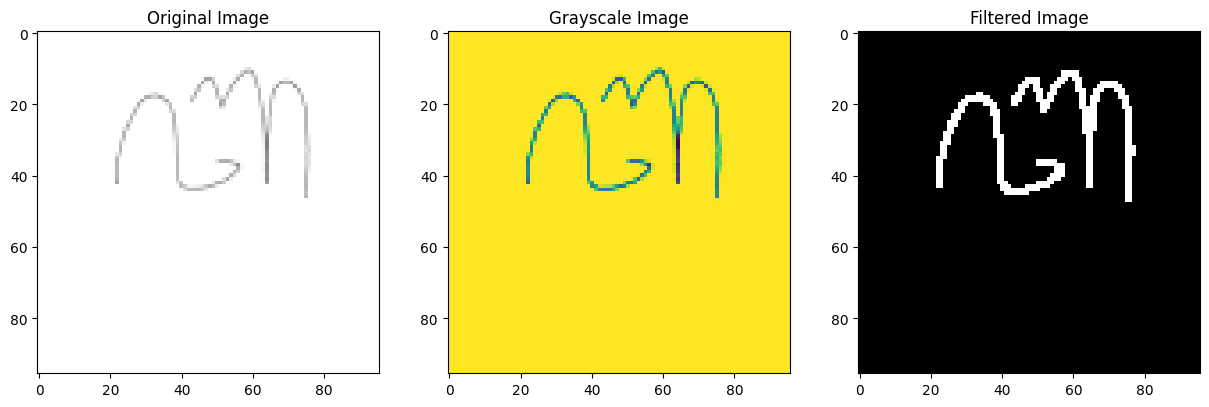

In [5]:
# Select one image to display
index_to_display = 14

# Display the original image, grayscale image, and filtered image
original_image = X_original[index_to_display]
grayscale_image = X_grayscale[index_to_display]
filtered_image = X_filtered[index_to_display]

# Plot the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(original_image)
plt.axis('on')

plt.subplot(1, 3, 2)
plt.title('Grayscale Image')
plt.imshow(grayscale_image)
plt.axis('on')

plt.subplot(1, 3, 3)
plt.title('Filtered Image')
# plt.imshow(filtered_image, cmap='gray')
plt.imshow(filtered_image, cmap='gray')
plt.axis('on')

plt.show()

In [6]:
# Reshape X_filtered
# X_filtered_reshaped = X_filtered.reshape(-1, 96, 96, 1).astype("float32") / 255  # Reshape dan normalisasi
X_filtered_reshaped = X_filtered.reshape(-1, 96, 96, 1) / 255  # Reshape dan normalisasi

print("X_filtered shape after reshape:", X_filtered_reshaped.shape)

X_filtered shape after reshape: (4355, 96, 96, 1)


In [7]:
from sklearn.model_selection import train_test_split

# Tahap pertama: Membagi data menjadi data pelatihan (80%) dan data pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(X_filtered_reshaped, y_label, test_size=0.2, random_state=54)

# # Tahap kedua: Membagi data sementara menjadi data validasi (20%) dan data pengujian (10%)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=37)

# Verifikasi ukuran data
print("Ukuran data pelatihan:", X_train.shape, y_train.shape)
# print("Ukuran data validasi:", X_val.shape, y_val.shape)
print("Ukuran data pengujian:", X_test.shape, y_test.shape)

Ukuran data pelatihan: (3484, 96, 96, 1) (3484, 20)
Ukuran data pengujian: (871, 96, 96, 1) (871, 20)


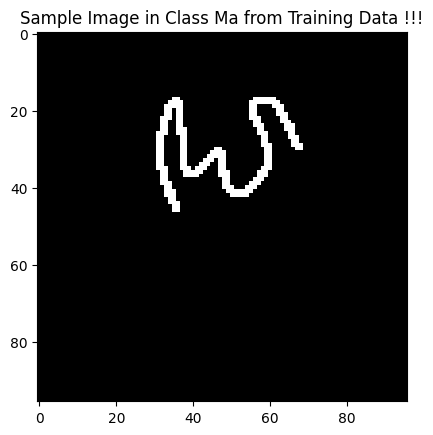

In [8]:
# Menampilkan salah satu gambar dari data pelatihan
plt.imshow(X_train[11], cmap='gray')
plt.title("Sample Image in Class {} from Training Data !!!".format(AKSARA[np.argmax(y_train[11])]))
plt.axis('on')
plt.show()

In [9]:
# # Menampilkan salah satu gambar dari data validasi
# plt.imshow(X_val[0], cmap='gray')
# plt.title("Sample Image in Class {} from Validasi Data !!!".format(AKSARA[np.argmax(y_val[0])]))
# plt.axis('on')
# plt.show()

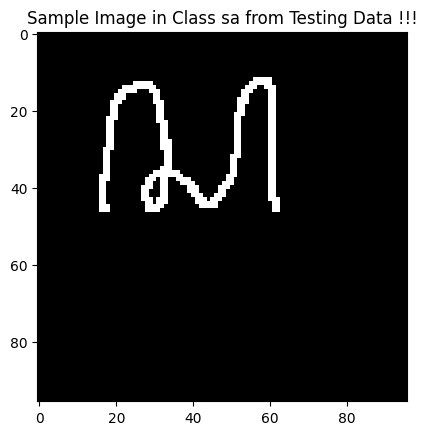

In [11]:
# Menampilkan salah satu gambar dari data pelatihan
plt.imshow(X_test[15], cmap='gray')
plt.title("Sample Image in Class {} from Testing Data !!!".format(AKSARA[np.argmax(y_test[15])]))
plt.axis('on')
plt.show()

# Build the Model

## Model 1

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras import optimizers

# Set hyperparameters tuning
optimizer = 'SGD'
learning_rate = 0.0001
dropout_rate = 0.2
weight_decay = 0.0001
momentum = 0.9
clip_norm = 0.0
num_classes = 20
input_shape = INPUT_SHAPE

def create_model(input_shape, num_classes, optimizer_name, learning_rate, dropout_rate, weight_decay, momentum, clip_norm):
    model = Sequential()

    # Block 1
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Block 2
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Block 3
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Block 4
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Block 5
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Flatten
    model.add(Flatten())

    # Dense layers
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Define optimizer with hyperparameters
    if optimizer_name == 'SGD':
        optimizer = optimizers.SGD(learning_rate=learning_rate, decay=weight_decay, momentum=momentum, clipnorm=clip_norm)
    elif optimizer_name == 'Adam':
        optimizer = optimizers.Adam(learning_rate=learning_rate, decay=weight_decay, clipnorm=clip_norm)
    elif optimizer_name == 'RMSprop':
        optimizer = optimizers.RMSprop(learning_rate=learning_rate, decay=weight_decay, clipnorm=clip_norm)
    else:
        raise ValueError("Optimizer not supported. Choose from 'SGD', 'Adam', or 'RMSprop'.")

    # Compile model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create the model
model = create_model(input_shape=input_shape, num_classes=num_classes, optimizer_name=optimizer, learning_rate=learning_rate, 
                     dropout_rate=dropout_rate, weight_decay=weight_decay, momentum=momentum, clip_norm=clip_norm)

# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 96, 96, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 96, 96, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 96, 96, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 96, 96, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 13,081,460 (49.90 MB)

 Trainable params: 13,072,628 (49.87 MB)

 Non-trainable params: 8,832 (34.50 KB)

In [14]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import pandas as pd
import numpy as np

# Callback for logging to CSV
class CustomCSVLogger(Callback):
    def __init__(self, filename):
        super(CustomCSVLogger, self).__init__()
        self.filename = filename
        self.epoch = 1

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['epoch'] = self.epoch
        self.epoch += 1
        df = pd.DataFrame([logs])
        if epoch == 0:
            df.to_csv(self.filename, mode='w', index=False)
        else:
            df.to_csv(self.filename, mode='a', header=False, index=False)

# Callback for testing evaluation
class TestEvaluationCallback(Callback):
    def __init__(self, test_data, test_log_filename):
        self.test_data = test_data
        self.test_log_filename = test_log_filename
        self.test_loss = []
        self.test_accuracy = []

    def on_epoch_end(self, epoch, logs=None):
        test_loss, test_accuracy = self.model.evaluate(self.test_data[0], self.test_data[1], verbose=0)
        self.test_loss.append(test_loss)
        self.test_accuracy.append(test_accuracy)
        print(f'\nEpoch {epoch+1}: Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
        # Save test evaluation to CSV
        with open(self.test_log_filename, 'a') as f:
            f.write(f"{epoch+1},{test_loss},{test_accuracy}\n")

# Define paths
csv_logger_v1 = "C:\\Users\\wawn1\\projects_skripsi\\save_models\\save_models_csv\\v4.4.5_log_train_v1.csv"
test_log_v1 = "C:\\Users\\wawn1\\projects_skripsi\\save_models\\save_models_csv\\v4.4.5_log_test_v1.csv"
model_filepath_v1 = "C:\\Users\\wawn1\\projects_skripsi\\save_models\\save_models_keras\\v4.4.5_keras_v1.keras"

# Define callbacks
early_stopping = EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=25, min_lr=0.0001)
csv_logger = CustomCSVLogger(csv_logger_v1)
model_checkpoint = ModelCheckpoint(filepath=model_filepath_v1, monitor='accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='auto')
test_eval_callback = TestEvaluationCallback((X_test, y_test), test_log_v1)

# Initialize test log file with header
with open(test_log_v1, 'w') as f:
    f.write("epoch,test_loss,test_accuracy\n")

# Train the model and save the logs to CSV
hist_v1 = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=64,
    callbacks=[
        # early_stopping,
        reduce_lr,
        model_checkpoint,
        csv_logger,
        test_eval_callback
    ]
)

Epoch 1/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.0600 - loss: 4.0525
Epoch 1: Test Loss: 3.033517837524414, Test Accuracy: 0.04477611929178238
55/55 ━━━━━━━━━━━━━━━━━━━━ 601s 11s/step - accuracy: 0.0600 - loss: 4.0521 - learning_rate: 1.0000e-04 - epoch: 1.0000
Epoch 2/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.0723 - loss: 3.8634 
Epoch 2: Test Loss: 3.1015610694885254, Test Accuracy: 0.0482204370200634
55/55 ━━━━━━━━━━━━━━━━━━━━ 655s 12s/step - accuracy: 0.0723 - loss: 3.8632 - learning_rate: 1.0000e-04 - epoch: 2.0000
Epoch 3/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.0852 - loss: 3.6974 
Epoch 3: Test Loss: 3.3066418170928955, Test Accuracy: 0.0482204370200634
55/55 ━━━━━━━━━━━━━━━━━━━━ 752s 14s/step - accuracy: 0.0852 - loss: 3.6970 - learning_rate: 1.0000e-04 - epoch: 3.0000
Epoch 4/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.0956 - loss: 3.5438 
Epoch 4: Test Loss: 3.433041572570801, Test Accuracy: 0.055109068751335144
55/55 ━

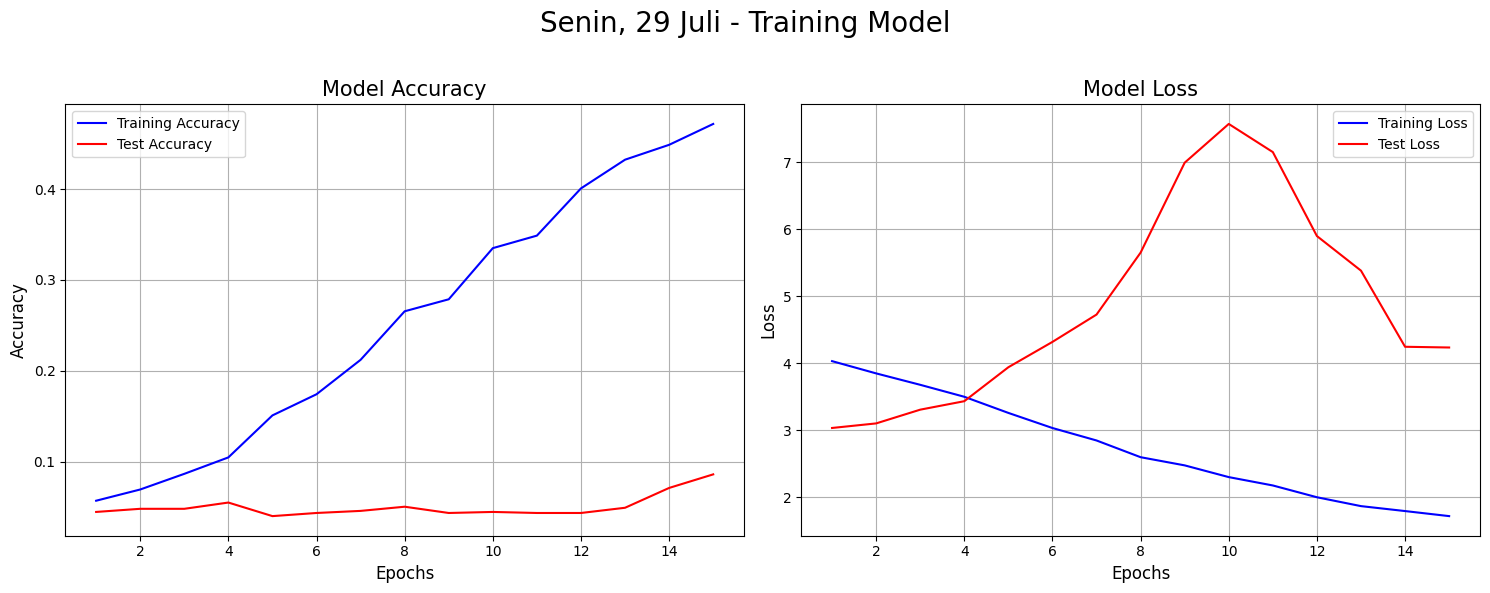

In [15]:
# Muat data dari file CSV
try:
    history_df = pd.read_csv(csv_logger_v1)
except FileNotFoundError:
    print(f"File tidak ditemukan di path: {csv_logger_v1}")
    history_df = None

try:
    test_history_df = pd.read_csv(test_log_v1)
except FileNotFoundError:
    print(f"File tidak ditemukan di path: {test_log_v1}")
    test_history_df = None

if history_df is not None and test_history_df is not None:
    # Dapatkan jumlah epoch dari panjang data
    epochs = range(1, len(history_df) + 1)

    # Plot akurasi dan loss
    plt.figure(figsize=(15, 6))
    plt.suptitle("Senin, 29 Juli - Training Model", fontsize=20)

    # Plot Akurasi Training, Validasi & Testing
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history_df['accuracy'], label='Training Accuracy', color='blue')
    # plt.plot(epochs, history_df['val_accuracy'], label='Validation Accuracy', color='green')
    plt.plot(test_history_df['epoch'], test_history_df['test_accuracy'], label='Test Accuracy', color='red')  # Plot Test Accuracy per epoch
    plt.title('Model Accuracy', fontsize=15)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(loc='best')
    plt.grid(True)

    # Plot Loss Training, Validasi & Testing
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history_df['loss'], label='Training Loss', color='blue')
    # plt.plot(epochs, history_df['val_loss'], label='Validation Loss', color='green')
    plt.plot(test_history_df['epoch'], test_history_df['test_loss'], label='Test Loss', color='red')  # Plot Test Loss per epoch
    plt.title('Model Loss', fontsize=15)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(loc='best')
    plt.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

Code dibawah digunakan untuk melanjutkan training - 02

In [ ]:
# from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# import tensorflow as tf

# # Callback for logging to CSV
# class CustomCSVLogger(Callback):
#     def __init__(self, filename, initial_epoch=1):
#         super(CustomCSVLogger, self).__init__()
#         self.filename = filename
#         self.epoch = initial_epoch

#     def on_epoch_end(self, epoch, logs=None):
#         logs = logs or {}
#         logs['epoch'] = self.epoch
#         self.epoch += 1
#         df = pd.DataFrame([logs])
#         if epoch == 0 and self.epoch == 2:
#             df.to_csv(self.filename, mode='w', index=False)
#         else:
#             df.to_csv(self.filename, mode='a', header=False, index=False)

# # Callback for testing evaluation
# class TestEvaluationCallback(Callback):
#     def __init__(self, test_data, test_log_filename, initial_epoch=1):
#         self.test_data = test_data
#         self.test_log_filename = test_log_filename
#         self.initial_epoch = initial_epoch

#     def on_epoch_end(self, epoch, logs=None):
#         test_loss, test_accuracy = self.model.evaluate(self.test_data[0], self.test_data[1], verbose=0)
#         print(f'\nEpoch {epoch+1}: Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
#         # Save test evaluation to CSV
#         with open(self.test_log_filename, 'a') as f:
#             f.write(f"{epoch+1},{test_loss},{test_accuracy}\n")

# # Define paths
# csv_logger_v1 = "C:\\Users\\M S I\\W\\projects_skripsi\\save_models\\save_models_csv\\v4.4.1_log_train_v1.csv"
# test_log_v1 = "C:\\Users\\M S I\\W\\projects_skripsi\\save_models\\save_models_csv\\v4.4.1_log_test_v1.csv"
# model_filepath_v1 = "C:\\Users\\M S I\\W\\projects_skripsi\\save_models\\save_models_keras\\v4.4.1_keras_v1.keras"

# # Load the last saved model
# try:
#     model = tf.keras.models.load_model(model_filepath_v1)
#     print("Model loaded from checkpoint.")
# except Exception as e:
#     print(f"Failed to load model from checkpoint: {e}")

# # Determine the last epoch trained
# try:
#     history_df = pd.read_csv(csv_logger_v1)
#     initial_epoch = history_df['epoch'].max()
# except FileNotFoundError:
#     print(f"File tidak ditemukan di path: {csv_logger_v1}")
#     history_df = None
#     initial_epoch = 1

# try:
#     test_history_df = pd.read_csv(test_log_v1)
# except FileNotFoundError:
#     print(f"File tidak ditemukan di path: {test_log_v1}")
#     test_history_df = None

# # Define callbacks
# early_stopping = EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=25, min_lr=0.0001)
# csv_logger = CustomCSVLogger(csv_logger_v1, initial_epoch=initial_epoch + 1)
# model_checkpoint = ModelCheckpoint(filepath=model_filepath_v1, monitor='accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='auto')
# test_eval_callback = TestEvaluationCallback((X_test, y_test), test_log_v1, initial_epoch=initial_epoch + 1)

# # Train the model and save the logs to CSV
# hist_v1 = model.fit(
#     X_train, y_train,
#     # validation_data=(X_val, y_val),
#     epochs=initial_epoch + 15,  # change this to the desired number of total epochs
#     batch_size=64,
#     initial_epoch=initial_epoch,
#     callbacks=[
#         # early_stopping,
#         reduce_lr,
#         model_checkpoint,
#         csv_logger,
#         test_eval_callback
#     ]
# )

In [ ]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, average_precision_score, precision_recall_curve
from itertools import cycle

# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred_probabilities = tf.nn.softmax(y_pred).numpy()  # Terapkan softmax secara eksplisit jika perlu
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
log_loss_value = log_loss(y_true_classes, y_pred_probabilities)

# Print metrik evaluasi
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {log_loss_value:.4f}")

In [ ]:
# Tampilkan classification report yang lengkap
report = classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Normalisasi confusion matrix untuk mendapatkan persentase
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Tampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2%", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()

In [32]:
# # Hitung AUC-ROC untuk setiap kelas
# auc_roc_scores = roc_auc_score(y_test, y_pred_probabilities, average=None)
# for idx, score in enumerate(auc_roc_scores):
#     print(f"AUC-ROC for class {AKSARA[idx]}: {score:.4f}")

# # Tampilkan ROC Curve untuk setiap kelas
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# n_classes = len(AKSARA)
# colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'blue', 'purple', 'pink', 'brown', 'grey', 
#                 'cyan', 'magenta', 'yellow', 'black', 'lime', 'navy', 'gold', 'teal', 'salmon', 'olive'])

# plt.figure(figsize=(10, 8))

# for i, color in zip(range(n_classes), colors):
#     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_probabilities[:, i])
#     roc_auc[i] = roc_auc_score(y_test[:, i], y_pred_probabilities[:, i])
#     plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {AKSARA[i]} (area = {roc_auc[i]:.2f})')

# plt.plot([0, 1], [0, 1], 'k--', lw=2)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
# plt.legend(loc="lower right")
# plt.show()

In [33]:
# # Hitung AUPRC untuk setiap kelas
# average_precision = dict()
# precision_recall_curves = dict()

# plt.figure(figsize=(10, 8))

# for i, color in zip(range(n_classes), colors):
#     precision_recall_curves[i], recall, _ = precision_recall_curve(y_test[:, i], y_pred_probabilities[:, i])
#     average_precision[i] = average_precision_score(y_test[:, i], y_pred_probabilities[:, i])
#     plt.plot(recall, precision_recall_curves[i], color=color, lw=2, label=f'PR curve of class {AKSARA[i]} (area = {average_precision[i]:.2f})')

# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve for each class')
# plt.legend(loc="lower right")
# plt.show()

In [ ]:
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

# Define the function to display images with predictions
def display_images_with_predictions(images, true_labels, predictions, labels, max_images=50):
    num_images = min(len(images), max_images)
    cols = 5
    rows = (num_images + cols - 1) // cols  # Compute number of rows needed

    plt.figure(figsize=(15, 3 * rows))
    
    for i in range(num_images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        
        # Check if prediction is correct
        correct = true_labels[i] == predictions[i]
        result = "Correct" if correct else "Incorrect"
        color = "green" if correct else "red"
        
        # Adjust title to avoid overlapping
        plt.title(
            f"True: {labels[true_labels[i]]} || Pred: {labels[predictions[i]]}\n{result}",
            color=color,
            fontsize=12,  # Set font size
            pad=5  # Add padding to title
        )
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Load the trained model
# model_path = "C:\\Users\\USER-03\\W\\projects_s\\save_models\\save_models_h5\\v4.2.7_model1.h5"
model = load_model(model_filepath_v1)

# Perform predictions
y_pred_probabilities = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

# Convert one-hot encoded y_test to class indices if needed
if y_test.ndim == 2:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test

# Display some test images with predictions
display_images_with_predictions(X_test, y_test_classes, y_pred_classes, AKSARA)

In [ ]:
import numpy as np
import cv2
from keras.preprocessing import image
from keras.models import load_model
import matplotlib.pyplot as plt

# Define the custom preprocessing function
def apply_custom_preprocessing(image):
    # Convert image to uint8 if not already
    # if image.dtype != np.uint8:
    #     image = np.uint8(image)
        
    # Apply Gaussian Blur
    ApplyGaussian = cv2.GaussianBlur(image, (15, 15), 0.1)
    # Enhance the image sharpness
    img = cv2.addWeighted(image, 1.5, ApplyGaussian, -0.5, 0, image)
    # Apply sharpening filter
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    img = cv2.filter2D(img, -1, kernel)
    # Remove noise using median filter
    img = cv2.medianBlur(img, 1)
    # Apply Otsu's thresholding
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # Invert the image (background to black, text to white)
    img = 255 - img
    
    # Apply dilation to thicken the lines
    kernel = np.ones((2, 2), np.uint8)  # You can adjust the kernel size
    img = cv2.dilate(img, kernel, iterations=1)
    
    return img

# Define the function to preprocess the image
def preprocess_image(img_path, image_size):
    # Load the image
    img = image.load_img(img_path, target_size=image_size, color_mode='grayscale')
    # Convert the image to array
    img_array = image.img_to_array(img)
    
    # Apply custom preprocessing
    img_array_preprocessed = apply_custom_preprocessing(img_array)
    
    # Normalize the image
    img_array_preprocessed = img_array_preprocessed.astype("float32") / 255.0
    # Expand dimensions to match input shape
    img_array_preprocessed = np.expand_dims(img_array_preprocessed, axis=-1)
    img_array_preprocessed = np.expand_dims(img_array_preprocessed, axis=0)
    
    return img_array_preprocessed

# Load the trained model
model = load_model(model_filepath_v1)  # Replace with your model path

# Path to the test image
test_image_path = "C:\\Users\\M S I\\W\\projects_skripsi\\data\\data_original\\CustomData\\data_prediction\\nya14.png"
image_size = IMAGE_SIZE

# Preprocess the image
preprocessed_image = preprocess_image(test_image_path, image_size)

# Perform the prediction
output = model.predict(preprocessed_image)

# Find the index of the maximum value in the output
pos = np.argmax(output)

# Print the result based on the index
print("Prediction output:\n", output)
print("Score: ", output[0][pos])

# Define a variable to store the predicted label
predicted_label = ""

# Print the class based on the position using if-elif
if pos == 0:
    predicted_label = "ba"
elif pos == 1:
    predicted_label = 'ca'
elif pos == 2:
    predicted_label = 'da'
elif pos == 3:
    predicted_label = 'dha'
elif pos == 4:
    predicted_label = 'ga'
elif pos == 5:
    predicted_label = 'ha'
elif pos == 6:
    predicted_label = 'ja'
elif pos == 7:
    predicted_label = 'ka'
elif pos == 8:
    predicted_label = 'la'
elif pos == 9:
    predicted_label = 'ma'
elif pos == 10:
    predicted_label = 'na'
elif pos == 11:
    predicted_label = 'nga'
elif pos == 12:
    predicted_label = 'nya'
elif pos == 13:
    predicted_label = 'pa'
elif pos == 14:
    predicted_label = 'ra'
elif pos == 15:
    predicted_label = 'sa'
elif pos == 16:
    predicted_label = 'ta'
elif pos == 17:
    predicted_label = 'tha'
elif pos == 18:
    predicted_label = 'wa'
elif pos == 19:
    predicted_label = 'ya'

# Print the predicted label
print("Aksara: ", predicted_label)

# Display the preprocessed image with prediction
plt.figure(figsize=(5, 5))

# Preprocessed Image
preprocessed_for_display = apply_custom_preprocessing(image.img_to_array(image.load_img(test_image_path, target_size=image_size, color_mode='grayscale')))
plt.imshow(preprocessed_for_display.squeeze(), cmap='gray')
plt.title(f"Predicted: {predicted_label} || Score: {output[0][pos]:.8f}")
plt.axis('on')

plt.show()

In [ ]:
import numpy as np
import cv2
from keras.preprocessing import image
from keras.models import load_model
import matplotlib.pyplot as plt

# Define the custom preprocessing function
def apply_custom_preprocessing(image):
    # Convert image to uint8 if not already
    # if image.dtype != np.uint8:
    #     image = np.uint8(image)
        
    # Apply Gaussian Blur
    ApplyGaussian = cv2.GaussianBlur(image, (15, 15), 0.1)
    # Enhance the image sharpness
    img = cv2.addWeighted(image, 1.5, ApplyGaussian, -0.5, 0, image)
    # Apply sharpening filter
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    img = cv2.filter2D(img, -1, kernel)
    # Remove noise using median filter
    img = cv2.medianBlur(img, 1)
    # Apply Otsu's thresholding
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # Invert the image (background to black, text to white)
    img = 255 - img
    
    # Apply dilation to thicken the lines
    kernel = np.ones((2, 2), np.uint8)  # You can adjust the kernel size
    img = cv2.dilate(img, kernel, iterations=1)
    
    return img

# Define the function to preprocess the image
def preprocess_image(img_path, image_size):
    # Load the image
    img = image.load_img(img_path, target_size=image_size, color_mode='grayscale')
    # Convert the image to array
    img_array = image.img_to_array(img)
    
    # Apply custom preprocessing
    img_array_preprocessed = apply_custom_preprocessing(img_array)
    
    # Normalize the image
    img_array_preprocessed = img_array_preprocessed.astype("float32") / 255.0
    # Expand dimensions to match input shape
    img_array_preprocessed = np.expand_dims(img_array_preprocessed, axis=-1)
    img_array_preprocessed = np.expand_dims(img_array_preprocessed, axis=0)
    
    return img_array_preprocessed, img_array

# Load the trained model
model = load_model(model_filepath_v1)  # Replace with your model path

# Path to the test image
test_image_path = "C:\\Users\\M S I\\W\\projects_skripsi\\data\\data_original\\CustomData\\data_prediction\\nya14.png"
image_size = IMAGE_SIZE

# Preprocess the image
preprocessed_image, original_image = preprocess_image(test_image_path, image_size)

# Perform the prediction
output = model.predict(preprocessed_image)

# Find the index of the maximum value in the output
max_val = output[0][0]
pos = 0
for i in range(1, len(output[0])):
    if output[0][i] > max_val:
        max_val = output[0][i]
        pos = i

# Print the result based on the index
print("Prediction output:\n", output)
print("Score: ", max_val)

# Define labels
labels = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 
          'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']
predicted_label = labels[pos]
print("Aksara: ", predicted_label)

# Display the preprocessed image with prediction
plt.figure(figsize=(5, 5))

# Preprocessed Image
preprocessed_for_display = apply_custom_preprocessing(image.img_to_array(image.load_img(test_image_path, target_size=image_size, color_mode='grayscale')))
plt.imshow(preprocessed_for_display.squeeze(), cmap='gray')
plt.title(f"Predicted: {predicted_label} || Score: {max_val:.8f}")
plt.axis('on')

plt.show()